##ID3

Accuracy: 0.958
Predicted Purchase: 0
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              1
1  Female   47   64727           1   5188  False              0
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              1
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.9525959367945824
Precision: 0.9419642857142857
Recall: 0.9634703196347032
Confusion Matrix:
 [[268  13]
 [  8 211]]
ROC AUC Score: 0.9586034872194868


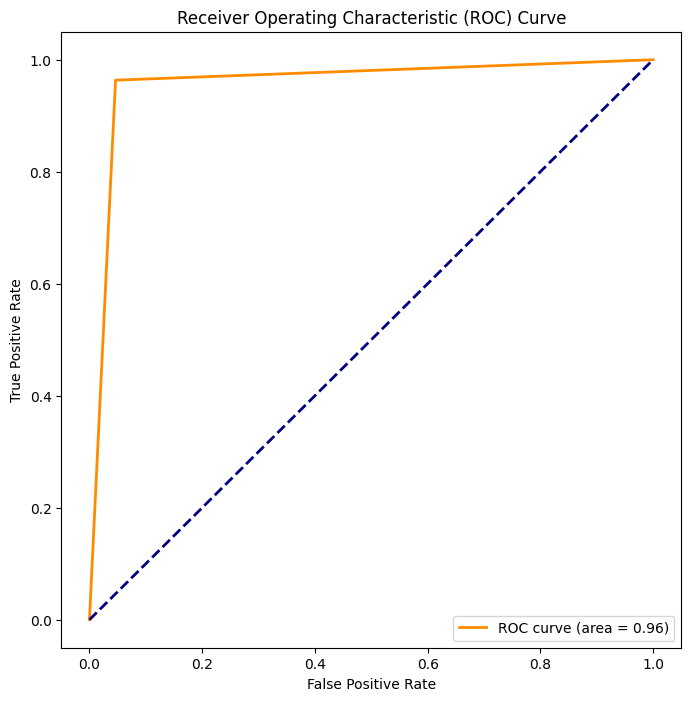

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       281
           1       0.94      0.96      0.95       219

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

Error Rate: 0.04200000000000004


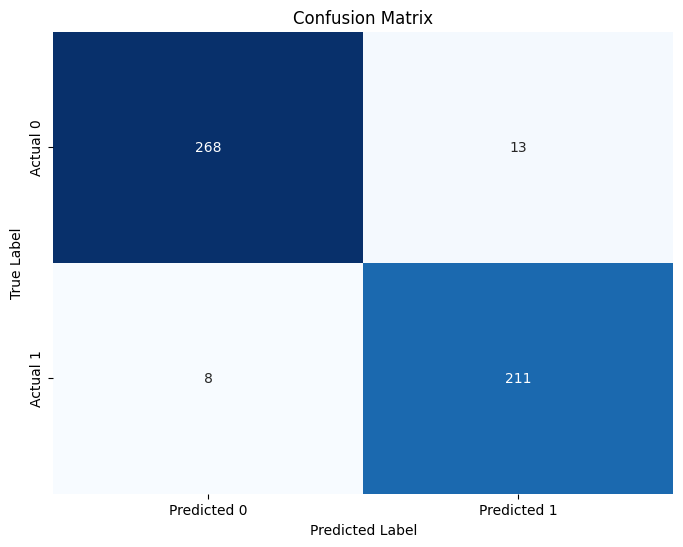

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the Decision Tree classifier
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree classifier
id3_classifier.fit(x_train, y_train)

# Make predictions
y_pred = id3_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('id3_model.pickle', 'wb') as f:
    pickle.dump(id3_classifier, f)

with open('scaler_id3.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved Decision Tree model and scaler
with open('id3_model.pickle', 'rb') as f:
    loaded_id3_model = pickle.load(f)

with open('scaler_id3.pickle', 'rb') as f:
    loaded_scaler_id3 = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler
new_data_scaled = loaded_scaler_id3.transform(new_data)

# Make predictions using the loaded Decision Tree model
prediction = loaded_id3_model.predict(new_data_scaled)

# Print the prediction
print("Predicted Purchase:", prediction[0])

import pickle

with open('id3_model.pickle', 'rb') as f:
    id3_new = pickle.load(f)

with open('scaler_id3.pickle', 'rb') as f:
    scaler_id3_new = pickle.load(f)

import pandas as pd
new_df = pd.read_csv("Dataset/Test.csv")

gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
gender_encoded_new

df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

df_new_2

x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

x_new

x_new_scale2 = scaler_id3_new.transform(x_new)

x_new_scale2

y_new_pred = id3_new.predict(x_new_scale2)

y_new_pred

df_new_2['will_purchase'] = y_new_pred

print(df_new_2)


# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score
y_pred_prob = id3_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("Classification Report:\n", class_report)

conf_matrix = [[268, 13], [8, 211]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# Error rate calculation
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


##Random Forest

Accuracy: 0.97
Predicted Purchase: 0
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              1
1  Female   47   64727           1   5188  False              1
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              1
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.9659863945578231
Precision: 0.9594594594594594
Recall: 0.9726027397260274
Confusion Matrix:
 [[272   9]
 [  6 213]]
ROC AUC Score: 0.9943125497651897


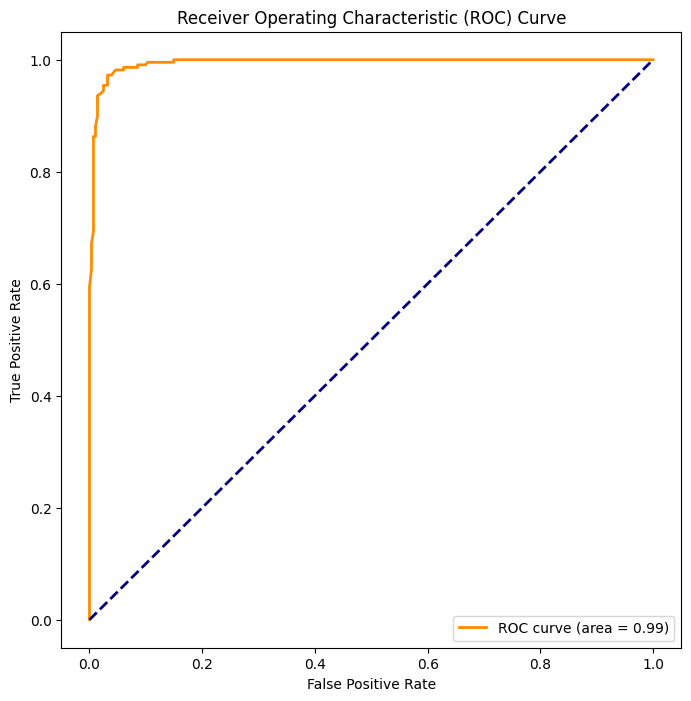

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       281
           1       0.96      0.97      0.97       219

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Error Rate: 0.030000000000000027


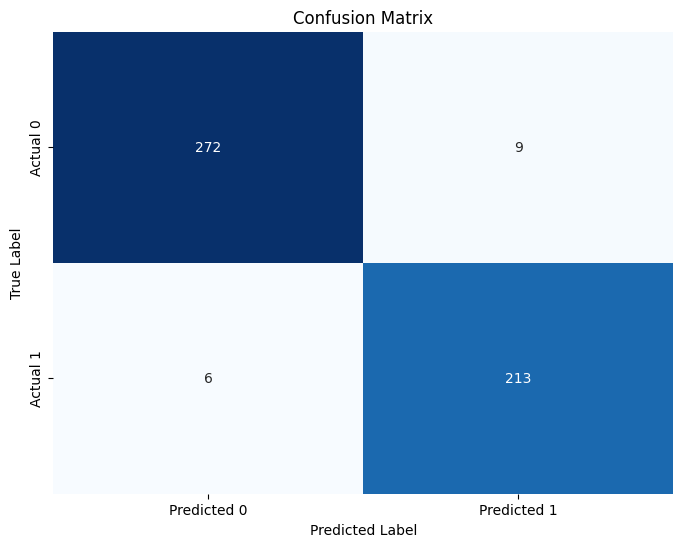

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the Random Forest classifier
rf_classifier.fit(x_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(rf_classifier, f)

with open('scaler_rf.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved Random Forest model and scaler
with open('random_forest_model.pickle', 'rb') as f:
    loaded_rf_model = pickle.load(f)

with open('scaler_rf.pickle', 'rb') as f:
    loaded_scaler_rf = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler
new_data_scaled = loaded_scaler_rf.transform(new_data)

# Make predictions using the loaded Random Forest model
prediction = loaded_rf_model.predict(new_data_scaled)

# Print the prediction
print("Predicted Purchase:", prediction[0])

import pickle

with open('random_forest_model.pickle', 'rb') as f:
    rf_new = pickle.load(f)

with open('scaler_rf.pickle', 'rb') as f:
    scaler_rf_new = pickle.load(f)

import pandas as pd
new_df = pd.read_csv("Dataset/Test.csv")

gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
gender_encoded_new

df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

df_new_2

x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

x_new

x_new_scale2 = scaler_rf_new.transform(x_new)

x_new_scale2

y_new_pred = rf_new.predict(x_new_scale2)

y_new_pred

df_new_2['will_purchase'] = y_new_pred

print(df_new_2)


# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score
y_pred_prob = rf_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save the ROC curve plot as an image
plt.show()

print("Classification Report:\n", class_report)

# Error rate calculation
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix
conf_matrix = [[272, 9], [6, 213]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot as an image
plt.show()



##KNN

Accuracy: 0.832
Predicted Purchase: 0
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              0
1  Female   47   64727           1   5188  False              1
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              0
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.7971014492753623
Precision: 0.8461538461538461
Recall: 0.7534246575342466
Confusion Matrix:
 [[251  30]
 [ 54 165]]
ROC AUC Score: 0.9257056500755619


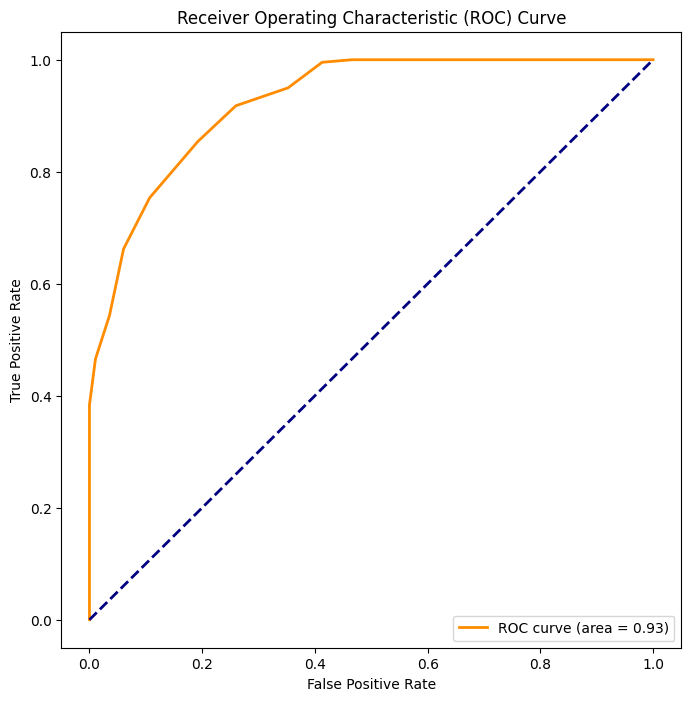

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       281
           1       0.85      0.75      0.80       219

    accuracy                           0.83       500
   macro avg       0.83      0.82      0.83       500
weighted avg       0.83      0.83      0.83       500

Error Rate: 0.16800000000000004


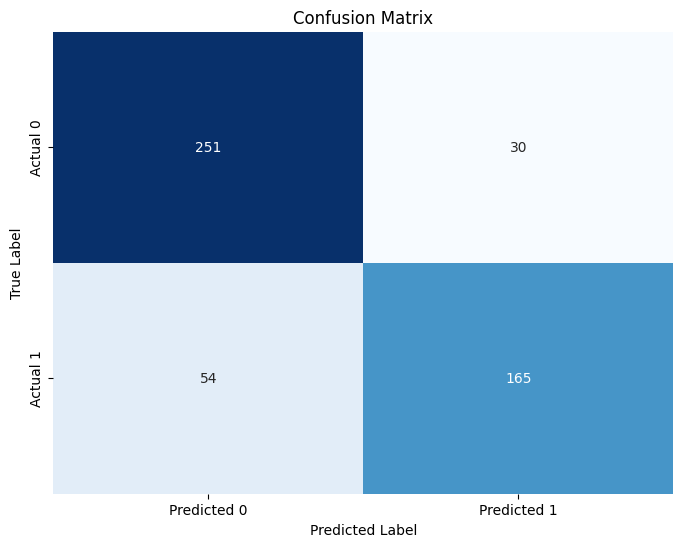

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import pickle
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the KNN classifier
k = 10  # Adjusting k value
metric = 'euclidean'  # Choosing distance metric
knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

# Train the KNN classifier
knn.fit(x_train, y_train)

# Make predictions
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn, f)

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved KNN model and scaler
with open('knn_model.pickle', 'rb') as f:
    knn_new = pickle.load(f)

with open('scaler.pickle','rb') as f:
    scaler_new = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler
new_data_scaled = scaler_new.transform(new_data)

# Make predictions using the loaded KNN model
prediction = knn_new.predict(new_data_scaled)

# Print the prediction
print("Predicted Purchase:", prediction[0])

# Load the new dataset for prediction
new_df = pd.read_csv("Dataset/Test.csv")

# Encode categorical variables in the new dataset
gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

# Select features from the new dataset
x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

# Standardize the new dataset using the loaded scaler
x_new_scale2 = scaler_new.transform(x_new)

# Make predictions for the new dataset
y_new_pred = knn_new.predict(x_new_scale2)

# Add predictions to the new dataset
df_new_2['will_purchase'] = y_new_pred

# Display the new dataset with predictions
print(df_new_2)

# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score
y_pred_prob = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve_knn.png')  # Save the ROC curve plot as an image
plt.show()

print("Classification Report:\n", class_report)

# Error rate calculation
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix
conf_matrix = [[251, 30], [54, 165]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot as an image
plt.show()



##SVM

Accuracy: 0.772
Predicted Purchase: 1
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              0
1  Female   47   64727           1   5188  False              0
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              0
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.7336448598130841
Precision: 0.7511961722488039
Recall: 0.7168949771689498
Confusion Matrix:
 [[229  52]
 [ 62 157]]
ROC AUC Score: 0.8297014901119615


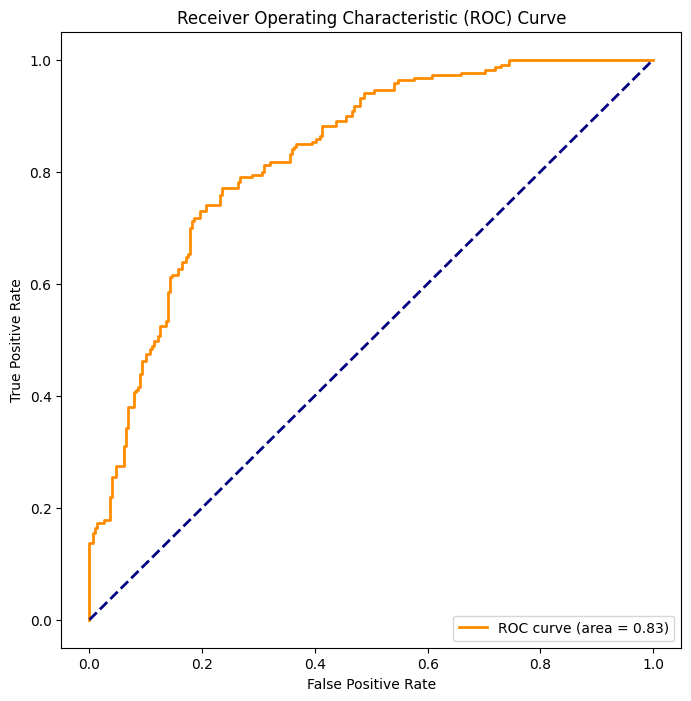

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       281
           1       0.75      0.72      0.73       219

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500

Error Rate: 0.22799999999999998


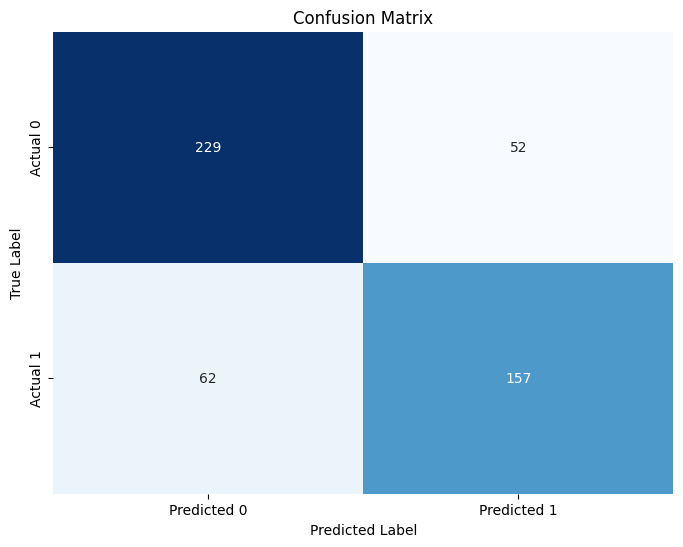

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import pickle

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)  # You can adjust the kernel and C parameter as needed

# Train the SVM classifier
svm_classifier.fit(x_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('svm_model.pickle', 'wb') as f:
    pickle.dump(svm_classifier, f)

with open('scaler_svm.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved SVM model and scaler
with open('svm_model.pickle', 'rb') as f:
    loaded_svm_model = pickle.load(f)

with open('scaler_svm.pickle', 'rb') as f:
    loaded_scaler_svm = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler
new_data_scaled = loaded_scaler_svm.transform(new_data)

# Make predictions using the loaded SVM model
prediction = loaded_svm_model.predict(new_data_scaled)

# Print the prediction
print("Predicted Purchase:", prediction[0])

import pickle

with open('svm_model.pickle', 'rb') as f:
    svm_new = pickle.load(f)

with open('scaler_svm.pickle', 'rb') as f:
    scaler_svm_new = pickle.load(f)

import pandas as pd
new_df = pd.read_csv("Dataset/Test.csv")

gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

df_new_2

x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

x_new

x_new_scale2 = scaler_svm_new.transform(x_new)

x_new_scale2

y_new_pred = svm_new.predict(x_new_scale2)

y_new_pred

df_new_2['will_purchase'] = y_new_pred

print(df_new_2)

# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score
y_pred_prob = svm_classifier.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve_svm.png')  # Save the ROC curve plot as an image
plt.show()

print("Classification Report:\n", class_report)

# Error rate calculation
error_rate = 1 - accuracy
print("Error Rate:", error_rate)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix
conf_matrix = [[229, 52], [62, 157]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot as an image
plt.show()



##Logistic Regression

Accuracy: 0.764
Predicted Purchase: 1
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              0
1  Female   47   64727           1   5188  False              0
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              0
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.7203791469194313
Precision: 0.7487684729064039
Recall: 0.6940639269406392
Confusion Matrix:
 [[230  51]
 [ 67 152]]
ROC AUC Score: 0.8308877297323649


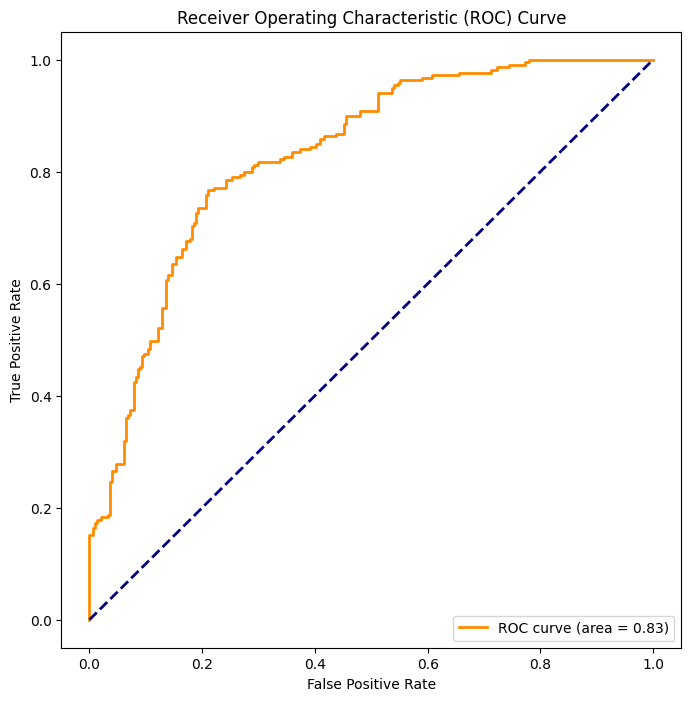

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       281
           1       0.75      0.69      0.72       219

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500

Error Rate: 0.236


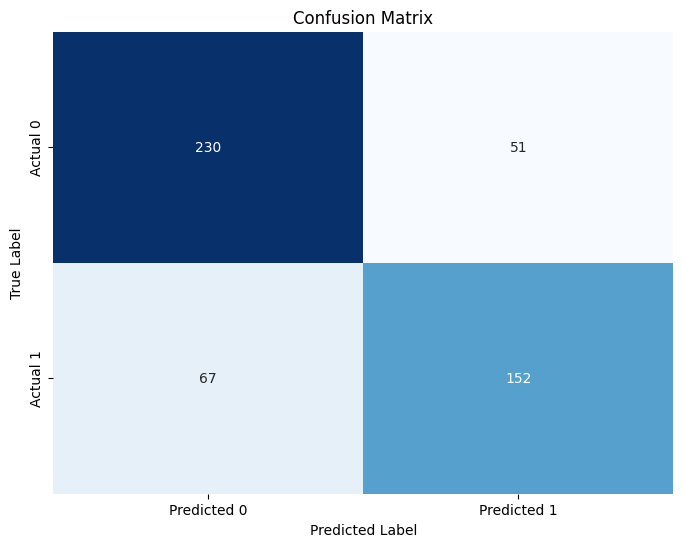

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import pickle

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier
logistic_classifier.fit(x_train, y_train)

# Make predictions
y_pred = logistic_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('logistic_model.pickle', 'wb') as f:
    pickle.dump(logistic_classifier, f)

with open('scaler_logistic.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved Logistic Regression model and scaler
with open('logistic_model.pickle', 'rb') as f:
    loaded_logistic_model = pickle.load(f)

with open('scaler_logistic.pickle', 'rb') as f:
    loaded_scaler_logistic = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler
new_data_scaled = loaded_scaler_logistic.transform(new_data)

# Make predictions using the loaded Logistic Regression model
prediction = loaded_logistic_model.predict(new_data_scaled)

# Print the prediction
print("Predicted Purchase:", prediction[0])

import pickle

with open('logistic_model.pickle', 'rb') as f:
    logistic_new = pickle.load(f)

with open('scaler_logistic.pickle', 'rb') as f:
    scaler_logistic_new = pickle.load(f)

import pandas as pd
new_df = pd.read_csv("Dataset/Test.csv")

gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

df_new_2

x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

x_new

x_new_scale2 = scaler_logistic_new.transform(x_new)

x_new_scale2

y_new_pred = logistic_new.predict(x_new_scale2)

y_new_pred

df_new_2['will_purchase'] = y_new_pred

print(df_new_2)

# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score
y_pred_prob = logistic_classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve_logistic.png')  # Save the ROC curve plot as an image
plt.show()

print("Classification Report:\n", class_report)

# Error rate calculation
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix
conf_matrix = [[230, 51], [67, 152]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot as an image
plt.show()



##Navie Bayes

Accuracy: 0.764
Predicted Purchase: 0
   Gender  Age  Salary  Product ID  Price   Male  will_purchase
0    Male   24   38652           3   4446   True              0
1  Female   47   64727           1   5188  False              0
2    Male   46   54648           1   6193   True              0
3    Male   31   20018           3   4779   True              0
4    Male   58   77731           2   6855   True              0
5    Male   28   55478           1   6153   True              0
6  Female   48   54211           2   7588  False              0
7    Male   31   60076           3   5238   True              0
8  Female   42   29290           1   5418  False              0
9    Male   50   21445           1   5598   True              0
F1 Score: 0.728110599078341
Precision: 0.7348837209302326
Recall: 0.7214611872146118
Confusion Matrix:
 [[224  57]
 [ 61 158]]


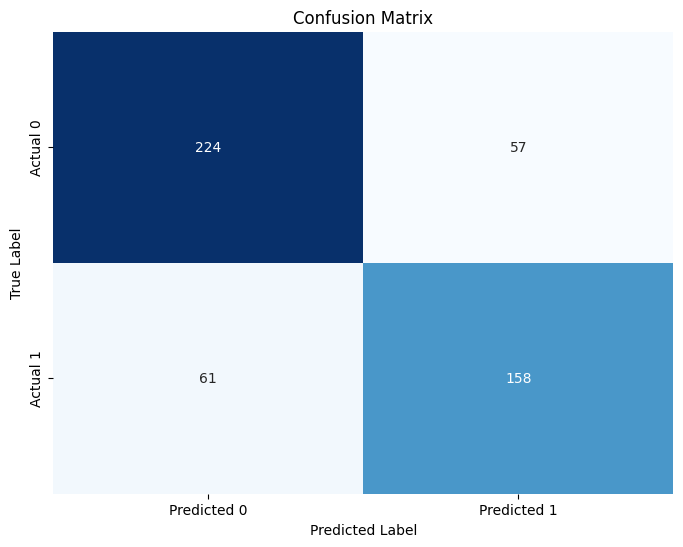

F1 Score: 0.728110599078341
Precision: 0.7348837209302326
Recall: 0.7214611872146118
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       281
           1       0.73      0.72      0.73       219

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500

Accuracy: 0.764
Error Rate: 0.236


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import pickle

# Load the dataset
df = pd.read_csv("Dataset\\New_purchase_history.csv")

# Encode categorical variables
gender_encoded = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender_encoded], axis=1)

# Define features and target variable
x = df[['Male', 'Age', 'Salary', 'Price']].values
y = df['Purchased'].values

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (not necessary for Naive Bayes, but included for consistency)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes classifier
naive_bayes_classifier.fit(x_train, y_train)

# Make predictions
y_pred = naive_bayes_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the model and scaler
with open('naive_bayes_model.pickle', 'wb') as f:
    pickle.dump(naive_bayes_classifier, f)

with open('scaler_naive_bayes.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Load the saved Naive Bayes model and scaler
with open('naive_bayes_model.pickle', 'rb') as f:
    loaded_naive_bayes_model = pickle.load(f)

with open('scaler_naive_bayes.pickle', 'rb') as f:
    loaded_scaler_naive_bayes = pickle.load(f)

# Define a new data point for prediction
new_data = np.array([[1, 30, 50000, 30]])  # Replace this with your own feature values

# Standardize the new data using the loaded scaler (not necessary for Naive Bayes)
new_data_scaled = loaded_scaler_naive_bayes.transform(new_data)

# Make predictions using the loaded Naive Bayes model
prediction = loaded_naive_bayes_model.predict(new_data)

# Print the prediction
print("Predicted Purchase:", prediction[0])

import pickle

with open('naive_bayes_model.pickle', 'rb') as f:
    naive_bayes_new = pickle.load(f)

with open('scaler_naive_bayes.pickle', 'rb') as f:
    scaler_naive_bayes_new = pickle.load(f)

import pandas as pd
new_df = pd.read_csv("Dataset/Test.csv")

gender_encoded_new = pd.get_dummies(new_df['Gender'], drop_first=True)
df_new_2 = pd.concat([new_df, gender_encoded_new], axis=1)

df_new_2

x_new = df_new_2[['Male', 'Age', 'Salary', 'Price']].to_numpy()

x_new

x_new_scale2 = scaler_naive_bayes_new.transform(x_new)

x_new_scale2

y_new_pred = naive_bayes_new.predict(x_new_scale2)

y_new_pred

df_new_2['will_purchase'] = y_new_pred

print(df_new_2)

# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC score (not applicable for Naive Bayes)
roc_auc = None

# Classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix
conf_matrix = [[224, 57], [61, 158]]

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot as an image
plt.show()


# Note: ROC Curve and AUC score are not applicable for Naive Bayes since it does not provide probabilities.
# If you need ROC Curve, you may consider using another classifier that supports it.

from sklearn.metrics import classification_report, accuracy_score

# Calculate additional metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print additional metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", class_report)

# Calculate accuracy and error rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
